In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## importing the dataset

In [2]:
data = pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
data = data.drop_duplicates()

## Normalize the time and amount columns

In [6]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
data['Time'] = sc.fit_transform(data['Time'].values.reshape(-1,1))
data['Amount'] = sc.fit_transform(data['Amount'].values.reshape(-1,1))

## Spliting the dataset into training and testing

In [9]:
from sklearn.model_selection import train_test_split
(train, test) = train_test_split(data, test_size=0.2, stratify = data['Class'])

In [14]:
train_X = train.iloc[:,:-1].values
train_y = train.iloc[:, -1].values

In [15]:
X_test = test.iloc[:,:-1].values
y_test = test.iloc[:,-1].values

## Training the model using LogisticRegression[Before SMOTE]

In [16]:
from sklearn.linear_model import LogisticRegression
before_lr = LogisticRegression()
before_lr.fit(train_X, train_y)

LogisticRegression()

In [17]:
before_y_pred_lr = before_lr.predict(X_test)

## Training the model using KNN[Before SMOTE]

In [18]:
from sklearn.neighbors import KNeighborsClassifier
before_knn = KNeighborsClassifier(n_neighbors = 5)
before_knn.fit(train_X, train_y)

KNeighborsClassifier()

In [35]:
before_y_pred_knn = before_knn.predict(X_test)

In [19]:
from sklearn.svm import SVC
before_svc = SVC()
before_svc.fit(train_X, train_y)

SVC()

In [59]:
before_y_pred_svc = before_svc.predict(X_test)

## Apply SMOTE

In [21]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(n_jobs=-1).fit_resample(train_X, train_y)

In [23]:
X_resampled

array([[-0.50127948, -0.25627746,  0.79302066, ..., -0.15651777,
        -0.21030757,  0.38937561],
       [ 0.84115368,  1.71251278, -0.7772944 , ...,  0.05550902,
        -0.04706755,  0.87539981],
       [-0.3494578 , -8.93489381, -6.32708255, ...,  1.36080652,
        -2.24392969,  8.74843554],
       ...,
       [-0.20056647, -3.51609295,  2.34819414, ..., -0.730178  ,
        -0.33431814,  0.30519399],
       [-0.26012436, -1.9486045 , -2.32173128, ..., -0.09120333,
        -0.45385228,  7.88215295],
       [-0.65001428,  0.16879651,  0.98403995, ...,  0.55439646,
         0.293999  ,  0.09516175]])

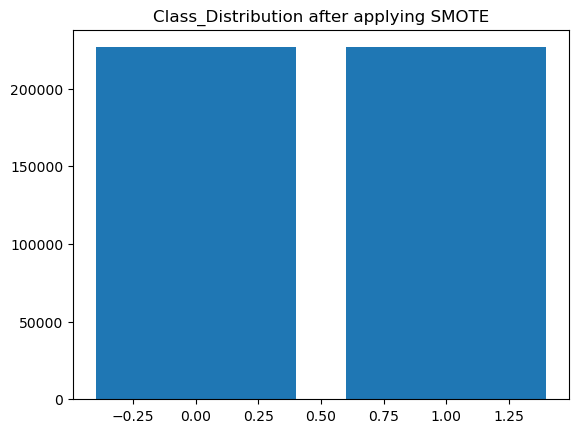

In [24]:
categories = [0,1]
values = [len(y_resampled[y_resampled == 0]), len(y_resampled[y_resampled == 1])]
plt.bar(categories, values)
plt.title('Class_Distribution after applying SMOTE')
plt.show()

## Training the model using LogisticRegression

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_resampled, y_resampled)

LogisticRegression()

In [26]:
y_pred_lr = lr.predict(test.iloc[:,:-1].values)

## Training the model using KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_resampled, y_resampled)

KNeighborsClassifier()

In [28]:
y_pred_knn = knn.predict(X_test)

## Training the model using SVC

In [33]:
svc = SVC()
svc.fit(X_resampled, y_resampled)

SVC()

In [62]:
y_pred_svc = svc.predict(X_test)

## Compare TP,FP,TN,FN before SMOTE and after SMOTE

In [64]:
## confusion matrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc, precision_score, recall_score
tn, fp, fn, tp = confusion_matrix(y_test, before_y_pred_lr).ravel()
print('********* Before SMOTE, for LogisticRegression ***********')
print('True Negatives: {}\nFalse Positives: {}\nFalse Negatives: {}\nTrue Positives: {}\nAccuracy_Score: {}\nrecall_score: {}'.format(tn, fp, fn, tp, 100* accuracy_score(y_test, before_y_pred_lr), recall_score(y_test, before_y_pred_lr)))

tn, fp, fn, tp = confusion_matrix(y_test, before_y_pred_knn).ravel()
print('********* Before SMOTE, for KNN ***********')
print('True Negatives: {}\nFalse Positives: {}\nFalse Negatives: {}\nTrue Positives: {}\nAccuracy_Score: {}\nrecall_score: {}'.format(tn, fp, fn, tp, 100* accuracy_score(y_test, before_y_pred_knn), recall_score(y_test, before_y_pred_knn)))

tn, fp, fn, tp = confusion_matrix(y_test, before_y_pred_svc).ravel()
print('********* Before SMOTE, for SVC ***********')
print('True Negatives: {}\nFalse Positives: {}\nFalse Negatives: {}\nTrue Positives: {}\nAccuracy_Score: {}\nrecall_score: {}'.format(tn, fp, fn, tp, 100* accuracy_score(y_test, before_y_pred_svc), recall_score(y_test, before_y_pred_svc)))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
print('********* After SMOTE, for LogisticRegression ***********')
print('True Negatives: {}\nFalse Positives: {}\nFalse Negatives: {}\nTrue Positives: {}\nAccuracy_Score: {}\nrecall_score: {}'.format(tn, fp, fn, tp, 100* accuracy_score(y_test, y_pred_lr), recall_score(y_test, y_pred_lr)))                                  

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
print('********* After SMOTE, for KNN ***********')
print('True Negatives: {}\nFalse Positives: {}\nFalse Negatives: {}\nTrue Positives: {}\nAccuracy_Score: {}\nrecall_score: {}'.format(tn, fp, fn, tp, 100* accuracy_score(y_test, y_pred_knn), recall_score(y_test, y_pred_knn)))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svc).ravel()
print('********* After SMOTE, for SVC ***********')
print('True Negatives: {}\nFalse Positives: {}\nFalse Negatives: {}\nTrue Positives: {}\nAccuracy_Score: {}\nrecall_score: {}'.format(tn, fp, fn, tp, 100* accuracy_score(y_test, y_pred_svc), recall_score(y_test, y_pred_svc)))

********* Before SMOTE, for LogisticRegression ***********
True Negatives: 56643
False Positives: 8
False Negatives: 43
True Positives: 52
Accuracy_Score: 99.91012582384661
recall_score: 0.5473684210526316
********* Before SMOTE, for KNN ***********
True Negatives: 56648
False Positives: 3
False Negatives: 19
True Positives: 76
Accuracy_Score: 99.96123074754168
recall_score: 0.8
********* Before SMOTE, for SVC ***********
True Negatives: 56651
False Positives: 0
False Negatives: 27
True Positives: 68
Accuracy_Score: 99.95241955380115
recall_score: 0.7157894736842105
********* After SMOTE, for LogisticRegression ***********
True Negatives: 55236
False Positives: 1415
False Negatives: 12
True Positives: 83
Accuracy_Score: 97.48528530645332
recall_score: 0.8736842105263158
********* After SMOTE, for KNN ***********
True Negatives: 56548
False Positives: 103
False Negatives: 12
True Positives: 83
Accuracy_Score: 99.79734254396786
recall_score: 0.8736842105263158
********* After SMOTE, for 

In [38]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(30,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7936      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [42]:
METRICS = [
#     keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=METRICS)

r = model.fit(
    X_resampled, y_resampled,
    validation_data=(X_test, y_test),
    batch_size=2048, 
    epochs=50, 
)

Epoch 1/50
222/222 [==============================] - 7s 25ms/step - loss: 0.0263 - fn: 1525.0000 - fp: 2529.0000 - tn: 224073.0000 - tp: 225077.0000 - precision: 0.9889 - recall: 0.9933 - val_loss: 0.0396 - val_fn: 11.0000 - val_fp: 744.0000 - val_tn: 55907.0000 - val_tp: 84.0000 - val_precision: 0.1014 - val_recall: 0.8842
Epoch 2/50
222/222 [==============================] - 6s 25ms/step - loss: 0.0207 - fn: 1062.0000 - fp: 2024.0000 - tn: 224578.0000 - tp: 225540.0000 - precision: 0.9911 - recall: 0.9953 - val_loss: 0.0273 - val_fn: 12.0000 - val_fp: 477.0000 - val_tn: 56174.0000 - val_tp: 83.0000 - val_precision: 0.1482 - val_recall: 0.8737
Epoch 3/50
222/222 [==============================] - 6s 25ms/step - loss: 0.0169 - fn: 773.0000 - fp: 1588.0000 - tn: 225014.0000 - tp: 225829.0000 - precision: 0.9930 - recall: 0.9966 - val_loss: 0.0273 - val_fn: 12.0000 - val_fp: 468.0000 - val_tn: 56183.0000 - val_tp: 83.0000 - val_precision: 0.1506 - val_recall: 0.8737
Epoch 4/50
222/222 [

In [46]:
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_resampled, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 


# y_train_pred_ann = model.predict(X_resampled)
# y_test_pred_ann = model.predict(X_test)

print_score(y_resampled, y_train_pred_ann.round(), train=True)
print_score(y_test, y_test_pred_ann.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_resampled, y_train_pred_ann.round()),
        'Test': f1_score(y_test, y_test_pred_ann.round()),
    },
}

Train Result:
Accuracy Score: 99.98%
_______________________________________________
Classification Report:
                       0              1  accuracy     macro avg  weighted avg
precision       1.000000       0.999581   0.99979       0.99979       0.99979
recall          0.999581       1.000000   0.99979       0.99979       0.99979
f1-score        0.999790       0.999790   0.99979       0.99979       0.99979
support    226602.000000  226602.000000   0.99979  453204.00000  453204.00000
_______________________________________________
Confusion Matrix: 
 [[226507     95]
 [     0 226602]]

Test Result:
Accuracy Score: 99.91%
_______________________________________________
Classification Report:
                      0          1  accuracy     macro avg  weighted avg
precision      0.999770   0.672131  0.999066      0.835951      0.999222
recall         0.999294   0.863158  0.999066      0.931226      0.999066
f1-score       0.999532   0.755760  0.999066      0.877646      0.999124